In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
data = df.drop(['PassengerId','Name'],axis=1)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [49]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_side      199
dtype: int64

In [41]:
data.Cabin = data.Cabin.astype('str')

In [42]:
import regex as re
def use_regex(input_text):
    pattern = re.search("([^/]+$)", input_text)
    return pattern.group(1)

In [43]:
data['Cabin_side'] = data.apply(lambda row: use_regex(row['Cabin']),axis=1)

In [44]:
data.drop(['Cabin'],axis=1,inplace=True)

In [48]:
data.Cabin_side.replace('nan',np.NAN,inplace=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_38736\2808442434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True)


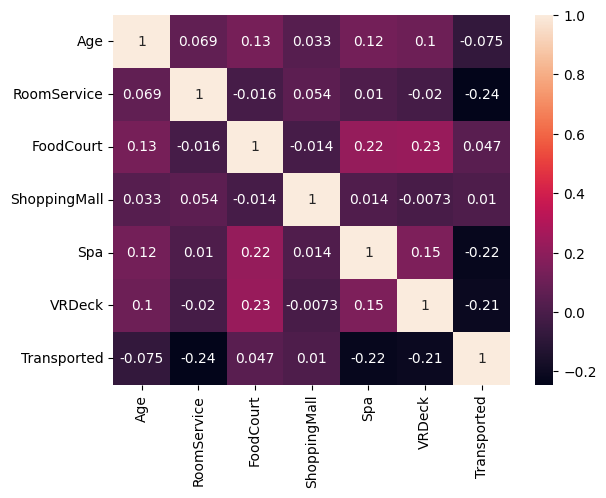

In [50]:
ax = sns.heatmap(data.corr(), annot=True)

In [51]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side']


In [58]:
for var in categorical: 
    
    print(data[var].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64
S    4288
P    4206
Name: Cabin_side, dtype: int64


In [64]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' levels')

HomePlanet  contains  4  levels
CryoSleep  contains  3  levels
Destination  contains  4  levels
VIP  contains  3  levels
Cabin_side  contains  3  levels


In [65]:
for var in categorical: 
    
    print(round(data[var].value_counts()/float(len(data)),2))

Earth     0.53
Europa    0.25
Mars      0.20
Name: HomePlanet, dtype: float64
False    0.63
True     0.35
Name: CryoSleep, dtype: float64
TRAPPIST-1e      0.68
55 Cancri e      0.21
PSO J318.5-22    0.09
Name: Destination, dtype: float64
False    0.95
True     0.02
Name: VIP, dtype: float64
S    0.49
P    0.48
Name: Cabin_side, dtype: float64


In [68]:
data[categorical].isnull().sum()

HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
Cabin_side     199
dtype: int64

In [69]:
pd.get_dummies(data.HomePlanet, drop_first=True, dummy_na=True).head()

,Europa,Mars,NaN
0,1,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0


In [70]:
data.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [71]:
pd.get_dummies(data.CryoSleep, drop_first=True, dummy_na=True).head()

,True,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [72]:
pd.get_dummies(data.CryoSleep, drop_first=True, dummy_na=True).sum(axis=0)

True    3037
NaN      217
dtype: int64

In [73]:
pd.get_dummies(data.Destination, drop_first=True, dummy_na=True).head()

,PSO J318.5-22,TRAPPIST-1e,NaN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [74]:
pd.get_dummies(data.VIP, drop_first=True, dummy_na=True).head()

,True,NaN
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [75]:
pd.get_dummies(data.Cabin_side, drop_first=True, dummy_na=True).head()

,S,NaN
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


Numerical variables

In [76]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [78]:
data[numerical].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True


In [85]:
data[numerical].isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [82]:
print(round(data[numerical].describe()),2)

          Age  RoomService  FoodCourt  ShoppingMall      Spa   VRDeck
count  8514.0       8512.0     8510.0        8485.0   8510.0   8505.0
mean     29.0        225.0      458.0         174.0    311.0    305.0
std      14.0        667.0     1611.0         605.0   1137.0   1146.0
min       0.0          0.0        0.0           0.0      0.0      0.0
25%      19.0          0.0        0.0           0.0      0.0      0.0
50%      27.0          0.0        0.0           0.0      0.0      0.0
75%      38.0         47.0       76.0          27.0     59.0     46.0
max      79.0      14327.0    29813.0       23492.0  22408.0  24133.0 2


most of these have outliers

Text(0, 0.5, 'Age')

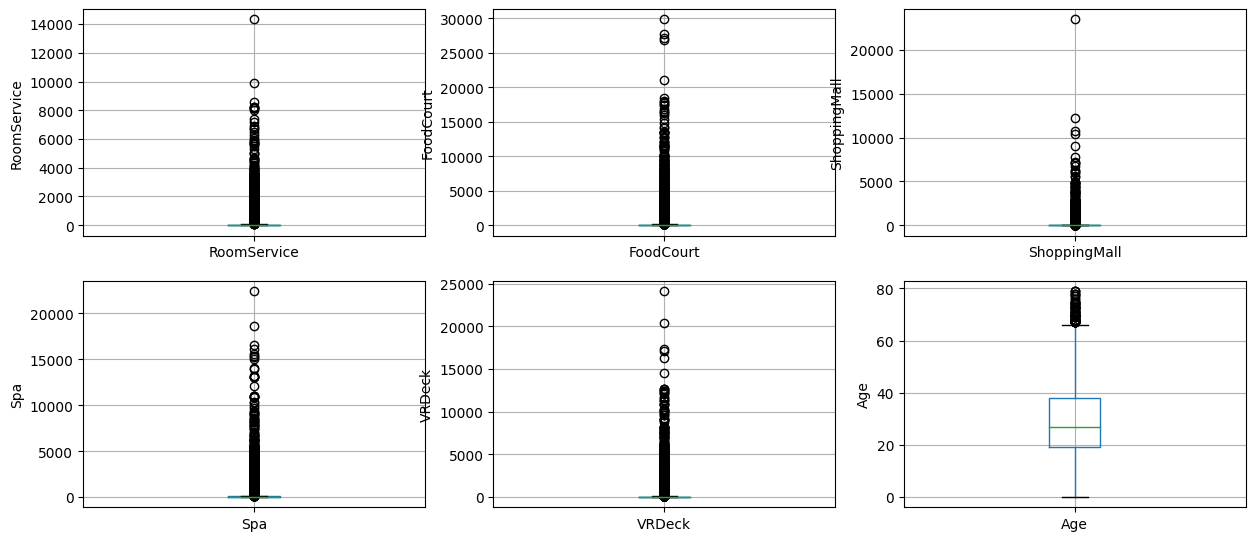

In [90]:
plt.figure(figsize=(15,10))


plt.subplot(3, 3, 1)
fig = data.boxplot(column='RoomService')
fig.set_title('')
fig.set_ylabel('RoomService')


plt.subplot(3, 3, 2)
fig = data.boxplot(column='FoodCourt')
fig.set_title('')
fig.set_ylabel('FoodCourt')


plt.subplot(3, 3, 3)
fig = data.boxplot(column='ShoppingMall')
fig.set_title('')
fig.set_ylabel('ShoppingMall')


plt.subplot(3, 3, 4)
fig = data.boxplot(column='Spa')
fig.set_title('')
fig.set_ylabel('Spa')

plt.subplot(3, 3, 5)
fig = data.boxplot(column='VRDeck')
fig.set_title('')
fig.set_ylabel('VRDeck')

plt.subplot(3, 3, 6)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

The above boxplots confirm that there are lot of outliers in these variables.

Text(0, 0.5, 'Transported')

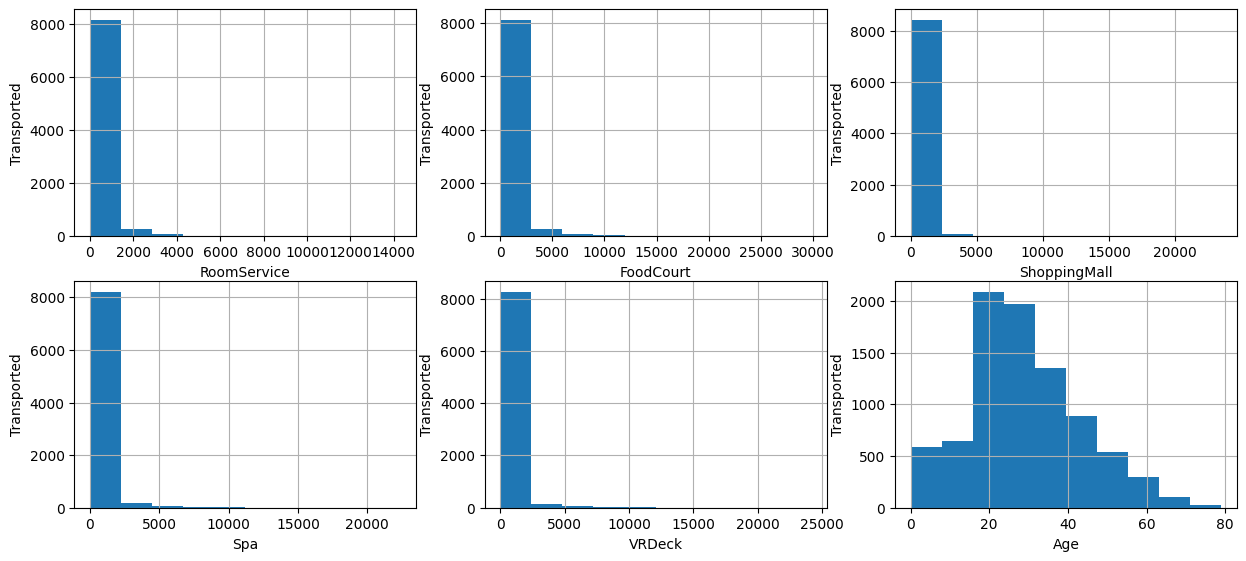

In [91]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 3, 1)
fig = data.RoomService.hist(bins=10)
fig.set_xlabel('RoomService')
fig.set_ylabel('Transported')


plt.subplot(3, 3, 2)
fig = data.FoodCourt.hist(bins=10)
fig.set_xlabel('FoodCourt')
fig.set_ylabel('Transported')


plt.subplot(3, 3, 3)
fig = data.ShoppingMall.hist(bins=10)
fig.set_xlabel('ShoppingMall')
fig.set_ylabel('Transported')


plt.subplot(3, 3, 4)
fig = data.Spa.hist(bins=10)
fig.set_xlabel('Spa')
fig.set_ylabel('Transported')

plt.subplot(3, 3, 5)
fig = data.VRDeck.hist(bins=10)
fig.set_xlabel('VRDeck')
fig.set_ylabel('Transported')

plt.subplot(3, 3, 6)
fig = data.Age.hist(bins=10)
fig.set_xlabel('Age')
fig.set_ylabel('Transported')

We can see that all the six variables are skewed. So, I will use interquantile range to find outliers.

In [93]:
# find outliers for RoomService variable

IQR = data.RoomService.quantile(0.75) - data.RoomService.quantile(0.25)
Lower_fence = data.RoomService.quantile(0.25) - (IQR * 3)
Upper_fence = data.RoomService.quantile(0.75) + (IQR * 3)
print('RoomService outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

RoomService outliers are values < -141.0 or > 188.0


In [94]:
# find outliers for FoodCourt variable

IQR = data.FoodCourt.quantile(0.75) - data.FoodCourt.quantile(0.25)
Lower_fence = data.FoodCourt.quantile(0.25) - (IQR * 3)
Upper_fence = data.FoodCourt.quantile(0.75) + (IQR * 3)
print('FoodCourt outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

FoodCourt outliers are values < -228.0 or > 304.0


In [95]:
# find outliers for ShoppingMall variable

IQR = data.ShoppingMall.quantile(0.75) - data.ShoppingMall.quantile(0.25)
Lower_fence = data.ShoppingMall.quantile(0.25) - (IQR * 3)
Upper_fence = data.ShoppingMall.quantile(0.75) + (IQR * 3)
print('ShoppingMall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

ShoppingMall outliers are values < -81.0 or > 108.0


In [96]:
# find outliers for Spa variable

IQR = data.Spa.quantile(0.75) - data.Spa.quantile(0.25)
Lower_fence = data.Spa.quantile(0.25) - (IQR * 3)
Upper_fence = data.Spa.quantile(0.75) + (IQR * 3)
print('Spa outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Spa outliers are values < -177.0 or > 236.0


In [97]:
# find outliers for VRDeck variable

IQR = data.VRDeck.quantile(0.75) - data.VRDeck.quantile(0.25)
Lower_fence = data.VRDeck.quantile(0.25) - (IQR * 3)
Upper_fence = data.VRDeck.quantile(0.75) + (IQR * 3)
print('VRDeck outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

VRDeck outliers are values < -138.0 or > 184.0


In [98]:
# find outliers for Age variable

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -38.0 or > 95.0


Feature Engineering

In [104]:
X = data.drop(['Transported'], axis=1)

y = data['Transported']

In [105]:
print(X.shape,y.shape)

(8693, 11) (8693,)


In [216]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [217]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6954, 11), (1739, 11))

In [218]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side']

In [219]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [220]:
X_train[numerical].isnull().sum()

Age             146
RoomService     151
FoodCourt       148
ShoppingMall    172
Spa             152
VRDeck          146
dtype: int64

In [221]:
X_test[numerical].isnull().sum()

Age             33
RoomService     30
FoodCourt       35
ShoppingMall    36
Spa             31
VRDeck          42
dtype: int64

In [222]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Age 0.021
RoomService 0.0217
FoodCourt 0.0213
ShoppingMall 0.0247
Spa 0.0219
VRDeck 0.021


Assumption: 
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [114]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)        

In [115]:
X_train[numerical].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [116]:
X_test[numerical].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Categorical data

In [119]:
X_train[categorical].isnull().sum()

HomePlanet     156
CryoSleep      170
Destination    149
VIP            176
Cabin_side     151
dtype: int64

In [117]:
X_train[categorical].isnull().mean()

HomePlanet     0.022433
CryoSleep      0.024446
Destination    0.021427
VIP            0.025309
Cabin_side     0.021714
dtype: float64

In [120]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['HomePlanet'].fillna(X_train['HomePlanet'].mode()[0], inplace=True)
    df2['CryoSleep'].fillna(X_train['CryoSleep'].mode()[0], inplace=True)
    df2['Destination'].fillna(X_train['Destination'].mode()[0], inplace=True)
    df2['VIP'].fillna(X_train['VIP'].mode()[0], inplace=True)
    df2['Cabin_side'].fillna(X_train['Cabin_side'].mode()[0], inplace=True)

In [121]:
X_train[categorical].isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Cabin_side     0
dtype: int64

In [122]:
X_test[categorical].isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Cabin_side     0
dtype: int64

In [124]:
X_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_side      0
dtype: int64

In [125]:
X_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_side      0
dtype: int64

Outlier handling

In [126]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['RoomService'] = max_value(df3, 'RoomService', 188)
    df3['FoodCourt'] = max_value(df3, 'FoodCourt', 304)
    df3['ShoppingMall'] = max_value(df3, 'ShoppingMall', 108)
    df3['Spa'] = max_value(df3, 'Spa', 236)
    df3['VRDeck'] = max_value(df3, 'VRDeck', 184)
    df3['Age'] = max_value(df3, 'Age', 95)

In [127]:
X_train.RoomService.max(), X_test.RoomService.max()

(188.0, 188.0)

In [128]:
X_train[numerical].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000
mean,28.833621,43.937446,68.390567,24.709520,53.331895,41.636037
std,14.330971,75.883222,120.465694,43.199665,92.927552,73.080167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.750000,45.000000,59.000000,23.000000,52.750000,40.000000
max,79.000000,188.000000,304.000000,108.000000,236.000000,184.000000


In [129]:
X_test[numerical].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000
mean,28.617021,39.940771,71.103508,23.756182,53.018401,41.626797
std,14.385874,73.145169,122.735055,42.515283,92.466028,72.848649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,25.000000,70.000000,18.000000,54.500000,40.000000
max,78.000000,188.000000,304.000000,108.000000,236.000000,184.000000


Encoding categorical variables

In [130]:
X_train[categorical].head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin_side
4278,Europa,False,55 Cancri e,False,S
5971,Earth,False,TRAPPIST-1e,False,P
464,Mars,False,TRAPPIST-1e,False,S
4475,Earth,False,TRAPPIST-1e,False,S
8469,Europa,True,55 Cancri e,False,S


In [133]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['CryoSleep','VIP'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [135]:
X_train.head()

,HomePlanet,CryoSleep_0,CryoSleep_1,Destination,Age,VIP_0,VIP_1,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
4278,Europa,0,1,55 Cancri e,54.0,0,1,0.0,304.0,0.0,236.0,184.0,S
5971,Earth,0,1,TRAPPIST-1e,20.0,0,1,0.0,20.0,1.0,236.0,0.0,P
464,Mars,0,1,TRAPPIST-1e,43.0,0,1,188.0,0.0,47.0,29.0,0.0,S
4475,Earth,0,1,TRAPPIST-1e,24.0,0,1,185.0,0.0,108.0,236.0,53.0,S
8469,Europa,1,0,55 Cancri e,25.0,0,1,0.0,0.0,0.0,0.0,0.0,S


In [137]:
X_train = pd.concat([X_train[numerical], X_train[['VIP_0','VIP_1','CryoSleep_0','CryoSleep_1']],
                     pd.get_dummies(X_train.Cabin_side), 
                     pd.get_dummies(X_train.Destination),
                     pd.get_dummies(X_train.HomePlanet)], axis=1)

In [138]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_0,VIP_1,CryoSleep_0,CryoSleep_1,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars
4278,54.0,0.0,304.0,0.0,236.0,184.0,0,1,0,1,0,1,1,0,0,0,1,0
5971,20.0,0.0,20.0,1.0,236.0,0.0,0,1,0,1,1,0,0,0,1,1,0,0
464,43.0,188.0,0.0,47.0,29.0,0.0,0,1,0,1,0,1,0,0,1,0,0,1
4475,24.0,185.0,0.0,108.0,236.0,53.0,0,1,0,1,0,1,0,0,1,1,0,0
8469,25.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,1,0,0,0,1,0


In [139]:
X_train.shape

(6954, 18)

In [140]:
X_test = pd.concat([X_test[numerical], X_test[['VIP_0','VIP_1','CryoSleep_0','CryoSleep_1']],
                     pd.get_dummies(X_test.Cabin_side), 
                     pd.get_dummies(X_test.Destination),
                     pd.get_dummies(X_test.HomePlanet)], axis=1)

In [141]:
X_test.shape

(1739, 18)

Feature Scaling

In [142]:
cols = X_train.columns

In [143]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [144]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [145]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [147]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_0,VIP_1,CryoSleep_0,CryoSleep_1,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars
count,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000,6954.000000
mean,0.364983,0.233710,0.224969,0.228792,0.225983,0.226283,0.022865,0.977135,0.348720,0.651280,0.485332,0.514668,0.205925,0.089445,0.704630,0.547455,0.245614,0.206931
std,0.181405,0.403634,0.396269,0.399997,0.393761,0.397175,0.149482,0.149482,0.476599,0.476599,0.499821,0.499821,0.404405,0.285405,0.456242,0.497779,0.430482,0.405135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.477848,0.239362,0.194079,0.212963,0.223517,0.217391,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


model building

In [148]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [149]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([False,  True, False, ...,  True, False, False])

In [150]:
logreg.predict_proba(X_test)[:,0]

array([0.68783676, 0.42539666, 0.79672244, ..., 0.23969859, 0.7999214 ,
       0.91228013])

In [152]:
# probability of getting output as 1 - True
logreg.predict_proba(X_test)[:,1]

array([0.31216324, 0.57460334, 0.20327756, ..., 0.76030141, 0.2000786 ,
       0.08771987])

In [153]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7642


In [155]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7728
Test set score: 0.7642


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

Using gridsearch for maximum accuracy

In [156]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2','elasticnet']}, {'solver':['liblinear','sag','saga']},
              {'C':[0.01,0.1,1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\shara\AppData\Local\Programs\Python

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet']},
                         {'solver': ['liblinear', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='accuracy')

In [157]:
print('Training set score: {:.4f}'.format(grid_search.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(grid_search.score(X_test, y_test)))

Training set score: 0.7726
Test set score: 0.7648


Conf Matrix

<AxesSubplot: >

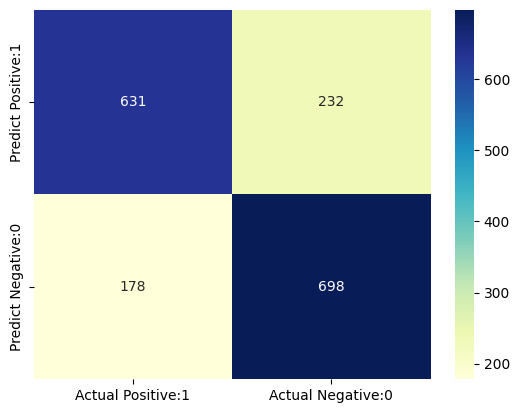

In [158]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Report

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.78      0.73      0.75       863
        True       0.75      0.80      0.77       876

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



In [160]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('\nClassification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('\nSpecificity : {0:0.4f}'.format(specificity))

true_positive_rate = TP / float(TP + FN)
print('\nTrue Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('\nFalse Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.7642

Classification error : 0.2358

Precision : 0.7312

Recall or Sensitivity : 0.7800

Specificity : 0.7505

True Positive Rate : 0.7800

False Positive Rate : 0.2495


Predictions on the test data

In [201]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [202]:
test_data = test_df.drop(['PassengerId','Name'],axis=1)

In [203]:
test_data.Cabin = test_data.Cabin.astype('str')
test_data['Cabin_side'] = test_data.apply(lambda row: use_regex(row['Cabin']),axis=1)
test_data.drop(['Cabin'],axis=1,inplace=True)
test_data.Cabin_side.replace('nan',np.NAN,inplace=True)

In [204]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,S


In [205]:
numerical = [var for var in test_data.columns if test_data[var].dtype!='O']

In [208]:
test_data[numerical].isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [215]:
X_train.Age.median()

Age    0.341772
dtype: float64

In [224]:
for df1 in [X_train, test_data]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True) 

In [225]:
for df2 in [X_train, test_data]:
    df2['HomePlanet'].fillna(X_train['HomePlanet'].mode()[0], inplace=True)
    df2['CryoSleep'].fillna(X_train['CryoSleep'].mode()[0], inplace=True)
    df2['Destination'].fillna(X_train['Destination'].mode()[0], inplace=True)
    df2['VIP'].fillna(X_train['VIP'].mode()[0], inplace=True)
    df2['Cabin_side'].fillna(X_train['Cabin_side'].mode()[0], inplace=True)

In [226]:
test_data = encoder.fit_transform(test_data)
test_data.head()

,HomePlanet,CryoSleep_0,CryoSleep_1,Destination,Age,VIP_0,VIP_1,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_side
0,Earth,0,1,TRAPPIST-1e,27.0,0,1,0.0,0.0,0.0,0.0,0.0,S
1,Earth,1,0,TRAPPIST-1e,19.0,0,1,0.0,9.0,0.0,2823.0,0.0,S
2,Europa,0,1,55 Cancri e,31.0,0,1,0.0,0.0,0.0,0.0,0.0,S
3,Europa,1,0,TRAPPIST-1e,38.0,0,1,0.0,6652.0,0.0,181.0,585.0,S
4,Earth,1,0,TRAPPIST-1e,20.0,0,1,10.0,0.0,635.0,0.0,0.0,S


In [227]:
test_data = pd.concat([test_data[numerical],test_data[['VIP_0','VIP_1','CryoSleep_0','CryoSleep_1']],
                     pd.get_dummies(test_data.Cabin_side), 
                     pd.get_dummies(test_data.Destination),
                     pd.get_dummies(test_data.HomePlanet)], axis=1)

In [228]:
test_data.shape

(4277, 18)

In [229]:
cols = test_data.columns
test_data = scaler.fit_transform(test_data)
test_data = pd.DataFrame(test_data, columns=[cols])
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_0,VIP_1,CryoSleep_0,CryoSleep_1,P,S,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.362315,0.018593,0.016959,0.020892,0.014911,0.013690,0.017302,0.982698,0.638999,0.361001,0.487257,0.512743,0.196633,0.090718,0.712649,0.549451,0.234276,0.216273
std,0.177588,0.052037,0.059754,0.066931,0.055678,0.055495,0.130409,0.130409,0.480347,0.480347,0.499896,0.499896,0.397499,0.287241,0.452580,0.497607,0.423595,0.411751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.468354,0.004150,0.002611,0.003256,0.002167,0.001392,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [237]:
y_pred_test = logreg.predict(test_data)
y_pred_test

array([ True,  True,  True, ...,  True,  True,  True])

In [238]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [239]:
final_df = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Transported':y_pred_test})

In [240]:
final_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [241]:
final_df.to_csv('Predictions.csv',index=False)